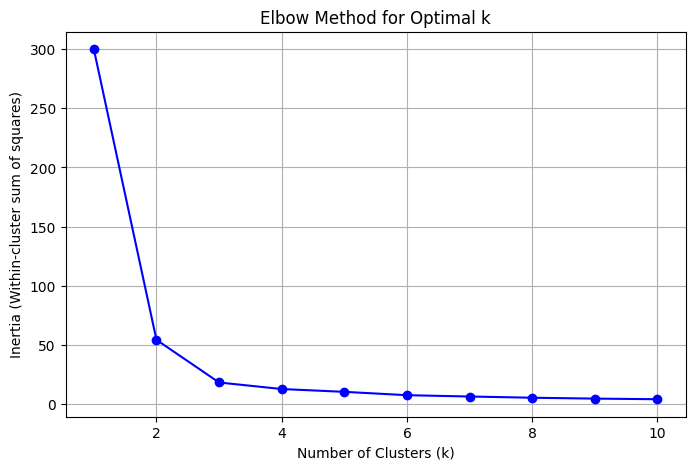

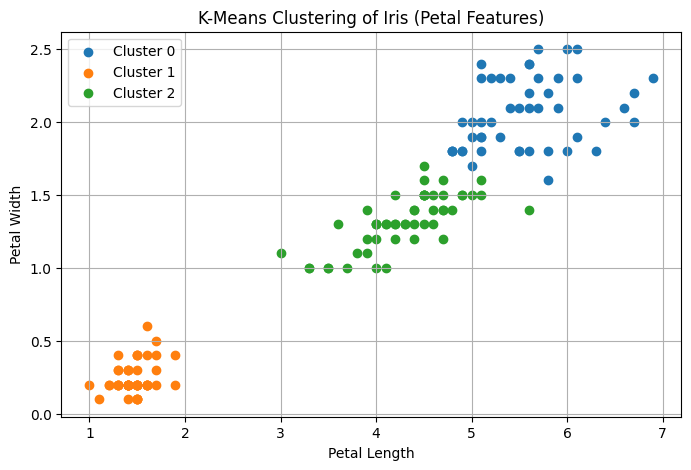

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
df = pd.read_csv("/content/iris.csv")

# 2. Drop Sepal features, keep only Petal length and width
X = df[['petal_length', 'petal_width']]

# 3. Scaling (K-Means is distance-based, scaling helps!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Elbow Method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# 5. Choose optimal k (usually at 'elbow' point, say k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6. Add clusters to original dataframe for visualization
df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(8,5))
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['petal_length'], cluster_data['petal_width'], label=f'Cluster {i}')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-Means Clustering of Iris (Petal Features)')
plt.legend()
plt.grid(True)
plt.show()
